In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [44]:
data_file = "conso.txt"

In [45]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [46]:
text='test'
filename='text.txt'
#save_text(filename)

In [47]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [48]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


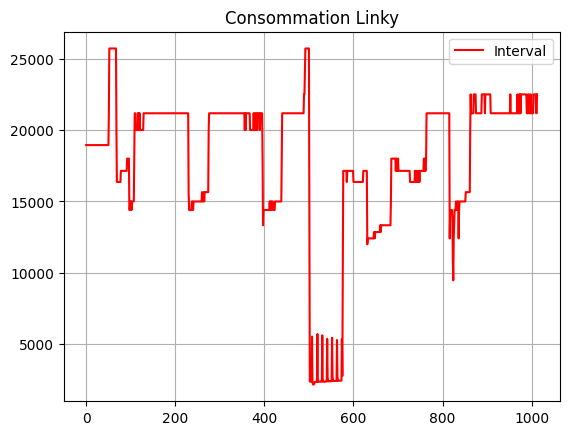

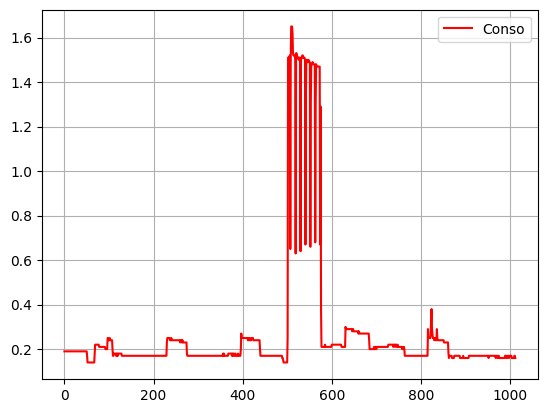

In [49]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [50]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [51]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178419 entries, 0 to 178418
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  178419 non-null  int64  
 1   kWh       178419 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.7 MB


In [52]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
178414,17666,0.20
178415,17545,0.20
178416,17284,0.21
178417,17473,0.21


<Axes: >

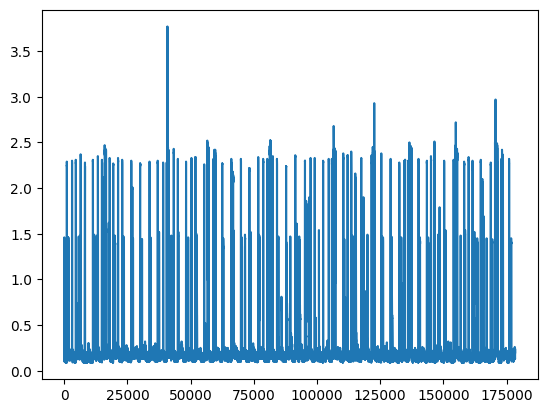

In [53]:
conso_data['kWh'].plot()

In [54]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
178414,17666,0.20,17.666,203.781275,4221539160
178415,17545,0.20,17.545,205.186663,4221556705
178416,17284,0.21,17.284,208.285119,4221573989
178417,17473,0.21,17.473,206.032164,4221591462


In [55]:
# index dernier echantillon
l=len(conso_data)-1
l

178418

In [56]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4221609021000

In [57]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 49, 8, 701782)

In [58]:
old

False

In [59]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178419 entries, 0 to 178418
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   178419 non-null  int64         
 1   kWh        178419 non-null  float64       
 2   sec        178419 non-null  float64       
 3   Wh         178419 non-null  float64       
 4   cumul(ms)  178419 non-null  int64         
 5   dates      178419 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 8.2 MB


In [60]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:49:34.990782,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:50:01.233782,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:50:27.118782,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:50:52.872782,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:51:18.646782,07/03/2024
...,...,...,...,...,...,...,...
178414,17666,0.20,17.666,203.781275,4221539160,2024-04-24 22:28:07.861782,24/04/2024
178415,17545,0.20,17.545,205.186663,4221556705,2024-04-24 22:28:25.406782,24/04/2024
178416,17284,0.21,17.284,208.285119,4221573989,2024-04-24 22:28:42.690782,24/04/2024
178417,17473,0.21,17.473,206.032164,4221591462,2024-04-24 22:29:00.163782,24/04/2024


In [61]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:49:34.990782   
 
          days  
 0  07/03/2024  ,
         Interval  kWh     sec          Wh   cumul(ms)  \
 178418     17559  0.2  17.559  205.023065  4221609021   
 
                             dates        days  
 178418 2024-04-24 22:29:17.722782  24/04/2024  )

In [62]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('24/04/2024', 4, 2024)

In [63]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
175313,38121,0.09,38.121,94.436138,4140662913,2024-04-24 00:00:11.614782,24/04/2024
175314,36731,0.10,36.731,98.009855,4140699644,2024-04-24 00:00:48.345782,24/04/2024
175315,35159,0.10,35.159,102.391991,4140734803,2024-04-24 00:01:23.504782,24/04/2024
175316,36587,0.10,36.587,98.395605,4140771390,2024-04-24 00:02:00.091782,24/04/2024
175317,37319,0.10,37.319,96.465607,4140808709,2024-04-24 00:02:37.410782,24/04/2024
...,...,...,...,...,...,...,...
178414,17666,0.20,17.666,203.781275,4221539160,2024-04-24 22:28:07.861782,24/04/2024
178415,17545,0.20,17.545,205.186663,4221556705,2024-04-24 22:28:25.406782,24/04/2024
178416,17284,0.21,17.284,208.285119,4221573989,2024-04-24 22:28:42.690782,24/04/2024
178417,17473,0.21,17.473,206.032164,4221591462,2024-04-24 22:29:00.163782,24/04/2024


In [64]:
day

'24/04/2024'

In [65]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:49:34.990782,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:50:01.233782,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:50:27.118782,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:50:52.872782,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:51:18.646782,07/03/2024
...,...,...,...,...,...,...,...
178414,17666,0.20,17.666,203.781275,4221539160,2024-04-24 22:28:07.861782,24/04/2024
178415,17545,0.20,17.545,205.186663,4221556705,2024-04-24 22:28:25.406782,24/04/2024
178416,17284,0.21,17.284,208.285119,4221573989,2024-04-24 22:28:42.690782,24/04/2024
178417,17473,0.21,17.473,206.032164,4221591462,2024-04-24 22:29:00.163782,24/04/2024


In [66]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [67]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.138
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.533
11/03/2024,4.543
12/03/2024,3.555
13/03/2024,3.540
14/03/2024,3.655
15/03/2024,3.562


In [68]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.327194
dtype: float64

In [69]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.641204
dtype: float64

In [70]:
filename='conso_par_jour.csv'
df_grp = grouped.count()/1000
df_grp.to_csv(filename)
filename='../conso_par_jour.csv'
df_grp.to_csv(filename)

In [71]:
data = list(df_grp['kWh'])
print(data)

import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

[3.138, 3.751, 3.082, 3.533, 4.543, 3.555, 3.54, 3.655, 3.562, 3.36, 3.35, 4.402, 3.507, 3.443, 3.549, 3.745, 3.526, 3.339, 3.89, 3.418, 3.474, 3.638, 3.756, 3.652, 3.832, 3.837, 3.819, 3.419, 3.476, 4.417, 3.403, 4.072, 3.78, 4.06, 3.433, 3.578, 3.446, 4.114, 3.272, 3.318, 3.702, 3.689, 4.219, 3.284, 3.379, 3.768, 4.095, 3.493, 3.106]


In [72]:
#manuel
#day = '11/03/2024'


In [73]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

3106

In [74]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
175313,38121,0.09,38.121,94.436138,4140662913,2024-04-24 00:00:11.614782,24/04/2024
175314,36731,0.10,36.731,98.009855,4140699644,2024-04-24 00:00:48.345782,24/04/2024
175315,35159,0.10,35.159,102.391991,4140734803,2024-04-24 00:01:23.504782,24/04/2024
175316,36587,0.10,36.587,98.395605,4140771390,2024-04-24 00:02:00.091782,24/04/2024
175317,37319,0.10,37.319,96.465607,4140808709,2024-04-24 00:02:37.410782,24/04/2024
...,...,...,...,...,...,...,...
178414,17666,0.20,17.666,203.781275,4221539160,2024-04-24 22:28:07.861782,24/04/2024
178415,17545,0.20,17.545,205.186663,4221556705,2024-04-24 22:28:25.406782,24/04/2024
178416,17284,0.21,17.284,208.285119,4221573989,2024-04-24 22:28:42.690782,24/04/2024
178417,17473,0.21,17.473,206.032164,4221591462,2024-04-24 22:29:00.163782,24/04/2024


In [75]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [76]:
conso_day.head(1).dates, conso_day.tail(1).dates


(175313   2024-04-24 00:00:11.614782
 Name: dates, dtype: datetime64[ns],
 178418   2024-04-24 22:29:17.722782
 Name: dates, dtype: datetime64[ns])

In [77]:
conso_day.loc[:,'dates']

175313   2024-04-24 00:00:11.614782
175314   2024-04-24 00:00:48.345782
175315   2024-04-24 00:01:23.504782
175316   2024-04-24 00:02:00.091782
175317   2024-04-24 00:02:37.410782
                    ...            
178414   2024-04-24 22:28:07.861782
178415   2024-04-24 22:28:25.406782
178416   2024-04-24 22:28:42.690782
178417   2024-04-24 22:29:00.163782
178418   2024-04-24 22:29:17.722782
Name: dates, Length: 3106, dtype: datetime64[ns]

In [78]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_8868\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:11,38121,0.09,38.121,94.436138,4140662913,2024-04-24 00:00:11.614782,24/04/2024
0:0:48,36731,0.10,36.731,98.009855,4140699644,2024-04-24 00:00:48.345782,24/04/2024
0:1:23,35159,0.10,35.159,102.391991,4140734803,2024-04-24 00:01:23.504782,24/04/2024
0:2:0,36587,0.10,36.587,98.395605,4140771390,2024-04-24 00:02:00.091782,24/04/2024
0:2:37,37319,0.10,37.319,96.465607,4140808709,2024-04-24 00:02:37.410782,24/04/2024
...,...,...,...,...,...,...,...
22:28:7,17666,0.20,17.666,203.781275,4221539160,2024-04-24 22:28:07.861782,24/04/2024
22:28:25,17545,0.20,17.545,205.186663,4221556705,2024-04-24 22:28:25.406782,24/04/2024
22:28:42,17284,0.21,17.284,208.285119,4221573989,2024-04-24 22:28:42.690782,24/04/2024


In [79]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('22:29:21', 3.106)

In [80]:
conso_jour=len(df['kWh'])

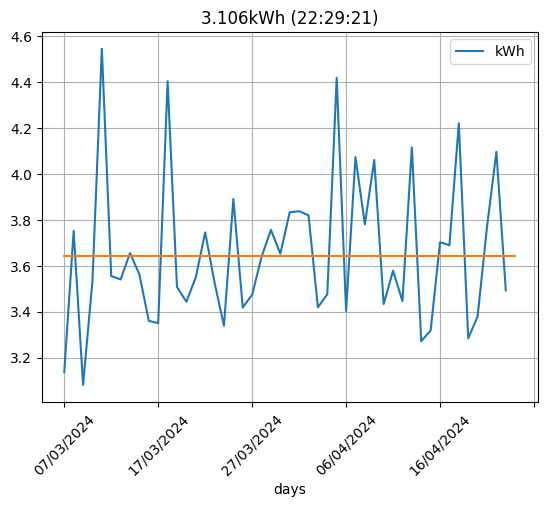

In [81]:
df_grp.iloc[:-1].plot()#kind='bar')
plt.plot((0,len(df_grp)-1),(mean,mean))
plt.title(str(len(df)/1000)+'kWh ('+str(here)+')')
plt.xticks(rotation=45)
plt.grid()


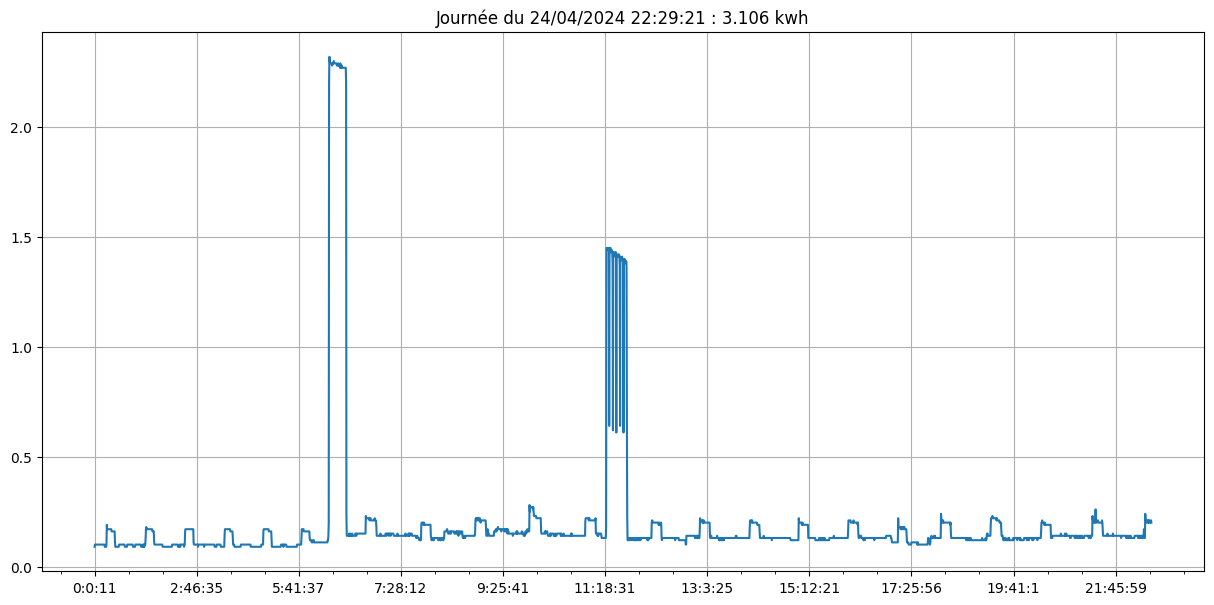

In [82]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [83]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]
df['power']

heure
0:0:11      0.09
0:0:48      0.10
0:1:23      0.10
0:2:0       0.10
0:2:37      0.10
            ... 
22:28:7     0.20
22:28:25    0.20
22:28:42    0.21
22:29:0     0.21
22:29:17    0.20
Name: power, Length: 3106, dtype: float64

<Axes: xlabel='heure'>

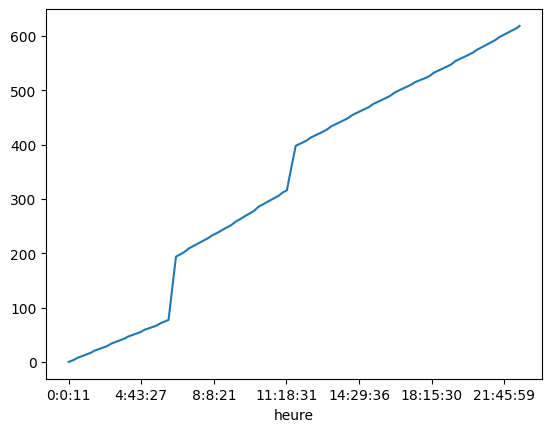

In [84]:
evo=df['power'].cumsum()
evo.plot()

112

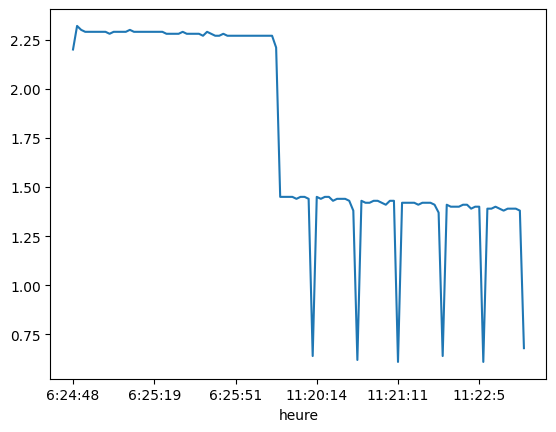

In [85]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

2471

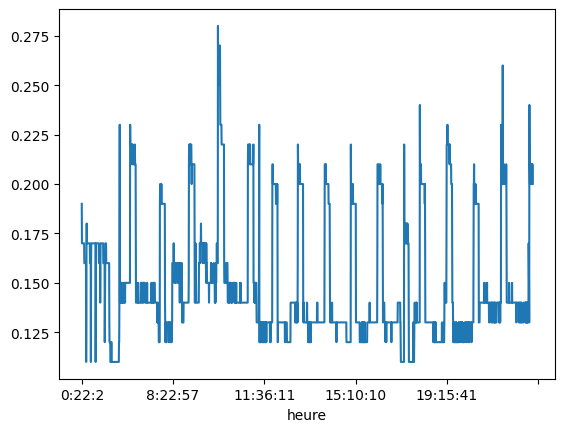

In [86]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

2994

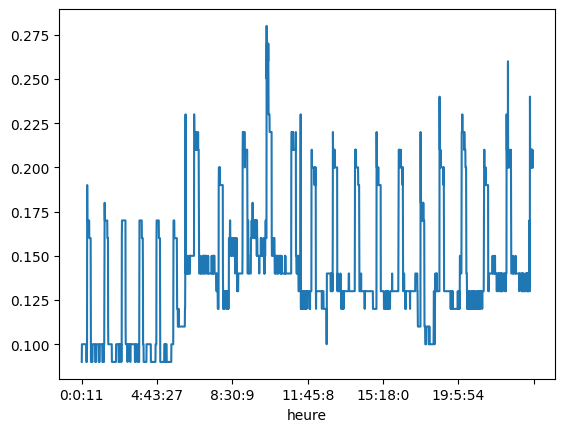

In [87]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [88]:
time = conso_data['dates']
#time


In [89]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [90]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [91]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

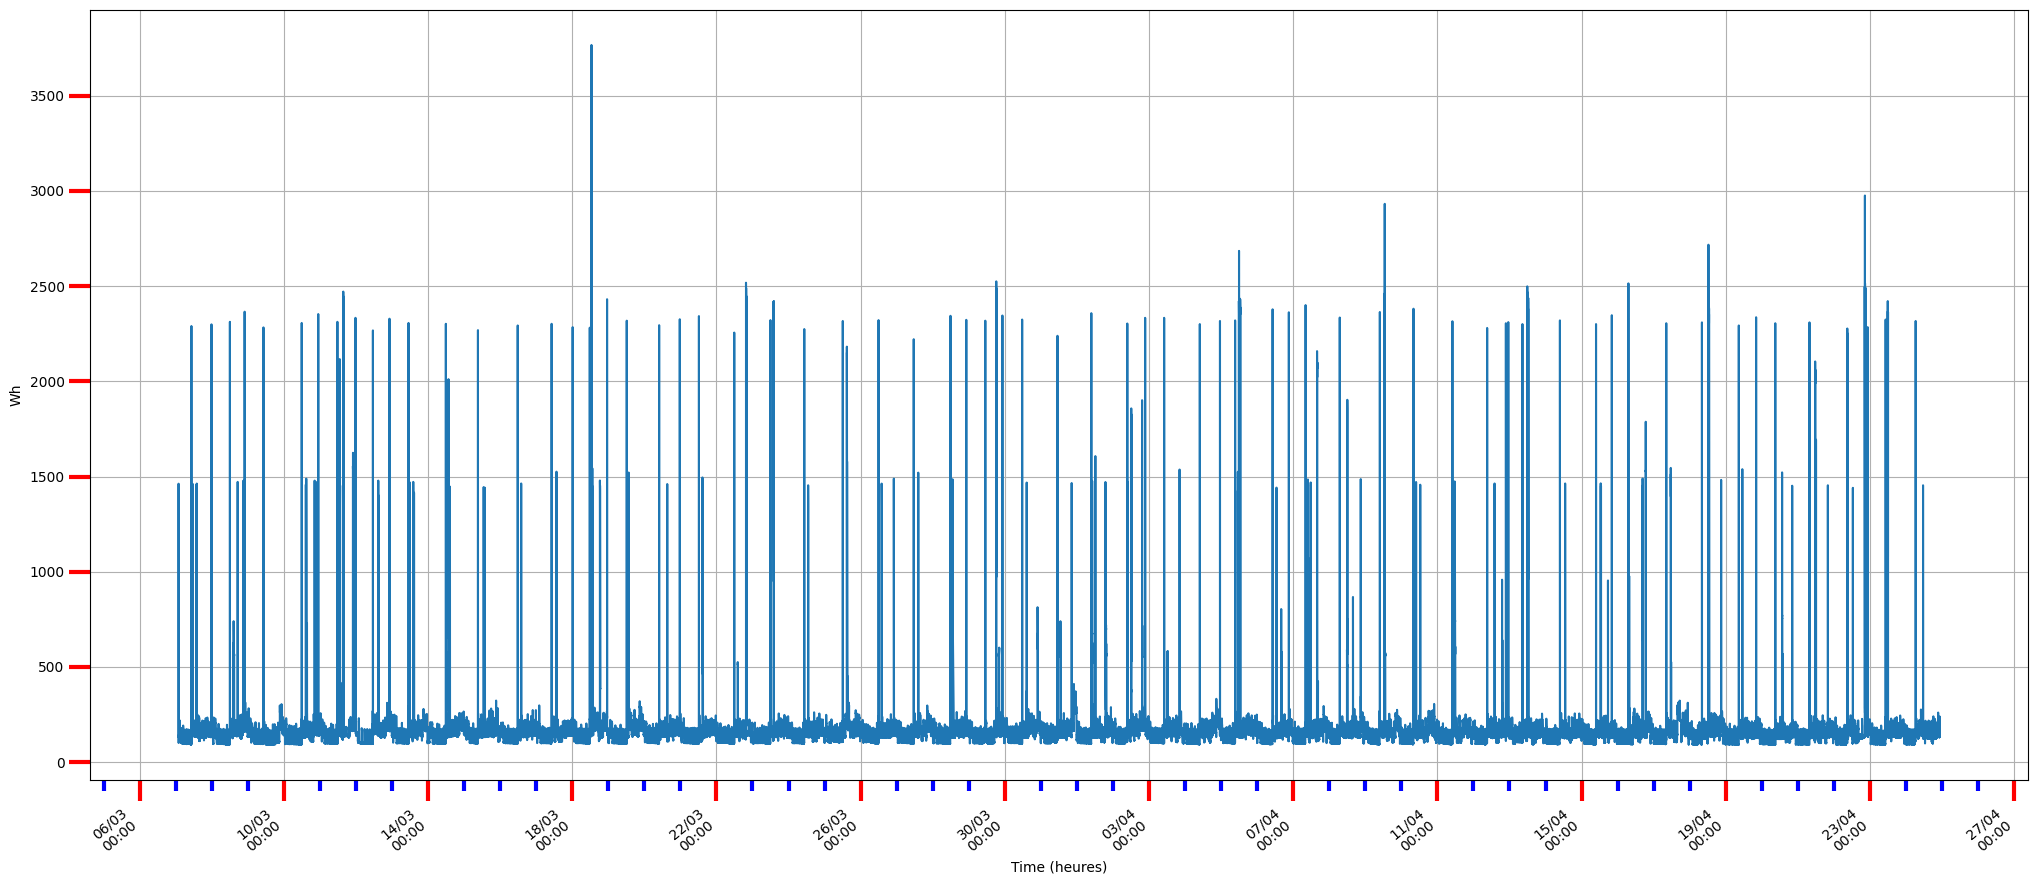

In [92]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [93]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
178418,17559,0.2,17.559,205.023065,4221609021,2024-04-24 22:29:17.722782,24/04/2024


In [94]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4221609021000

# Slice of last 1 kWh

In [95]:
l = len(conso_data)  # total watt consommés
l

178419

In [96]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(178419, 1000)

In [97]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [98]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 177419     28434  0.13  28.434  126.608989  4195562213   
 177420     27981  0.13  27.981  128.658733  4195590194   
 177421     28368  0.13  28.368  126.903553  4195618562   
 177422     28162  0.13  28.162  127.831830  4195646724   
 177423     28355  0.13  28.355  126.961735  4195675079   
 ...          ...   ...     ...         ...         ...   
 178414     17666  0.20  17.666  203.781275  4221539160   
 178415     17545  0.20  17.545  205.186663  4221556705   
 178416     17284  0.21  17.284  208.285119  4221573989   
 178417     17473  0.21  17.473  206.032164  4221591462   
 178418     17559  0.20  17.559  205.023065  4221609021   
 
                             dates        days  
 177419 2024-04-24 15:15:10.914782  24/04/2024  
 177420 2024-04-24 15:15:38.895782  24/04/2024  
 177421 2024-04-24 15:16:07.263782  24/04/2024  
 177422 2024-04-24 15:16:35.425782  24/04/2024  
 177423 2024-04-24 15:17:03.780782  24

In [99]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [100]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [101]:
cumtime_end,cumtime_start

(4221609021000, 4195590194000)

In [102]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

26018827000

In [103]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 24, 22, 29, 28, 644976),
 datetime.datetime(2024, 4, 24, 15, 15, 49, 817976),
 '24/04/2024 22:29:17')

In [104]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:49:34.990782,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:50:01.233782,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:50:27.118782,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:50:52.872782,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:51:18.646782,07/03/2024
...,...,...,...,...,...,...,...
178414,17666,0.20,17.666,203.781275,4221539160,2024-04-24 22:28:07.861782,24/04/2024
178415,17545,0.20,17.545,205.186663,4221556705,2024-04-24 22:28:25.406782,24/04/2024
178416,17284,0.21,17.284,208.285119,4221573989,2024-04-24 22:28:42.690782,24/04/2024
178417,17473,0.21,17.473,206.032164,4221591462,2024-04-24 22:29:00.163782,24/04/2024


In [105]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('24/04/2024 15:15:38', '24/04/2024 22:29:17')

In [106]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-24 15:15:10.914782', '2024-04-24 22:29:17.722782')

In [107]:
k

1

In [108]:
data.Interval.tail(1000)

177419    28434
177420    27981
177421    28368
177422    28162
177423    28355
          ...  
178414    17666
178415    17545
178416    17284
178417    17473
178418    17559
Name: Interval, Length: 1000, dtype: int64

In [109]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(7.243122777777779, 3.3134879438511056, 7, 14, 35)

In [110]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_8868\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [111]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
177419,28434,0.13,28.434,126.608989,4195562213,2024-04-24 15:15:10.914782,24/04/2024,2024-04-24 15:15:10.914782
177420,27981,0.13,27.981,128.658733,4195590194,2024-04-24 15:15:38.895782,24/04/2024,2024-04-24 15:15:38.895782
177421,28368,0.13,28.368,126.903553,4195618562,2024-04-24 15:16:07.263782,24/04/2024,2024-04-24 15:16:07.263782
177422,28162,0.13,28.162,127.831830,4195646724,2024-04-24 15:16:35.425782,24/04/2024,2024-04-24 15:16:35.425782
177423,28355,0.13,28.355,126.961735,4195675079,2024-04-24 15:17:03.780782,24/04/2024,2024-04-24 15:17:03.780782
...,...,...,...,...,...,...,...,...
178414,17666,0.20,17.666,203.781275,4221539160,2024-04-24 22:28:07.861782,24/04/2024,2024-04-24 22:28:07.861782
178415,17545,0.20,17.545,205.186663,4221556705,2024-04-24 22:28:25.406782,24/04/2024,2024-04-24 22:28:25.406782
178416,17284,0.21,17.284,208.285119,4221573989,2024-04-24 22:28:42.690782,24/04/2024,2024-04-24 22:28:42.690782
178417,17473,0.21,17.473,206.032164,4221591462,2024-04-24 22:29:00.163782,24/04/2024,2024-04-24 22:29:00.163782


<Axes: >

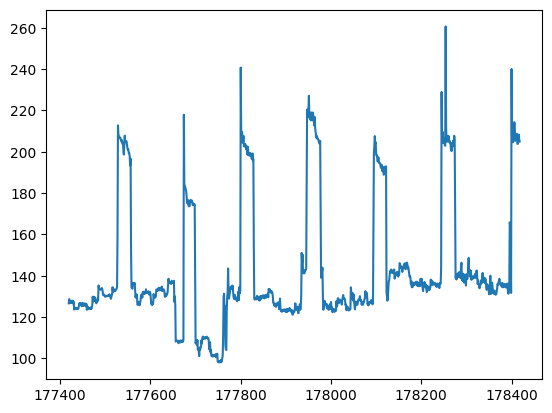

In [112]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [113]:
data['Wh']

177419    126.608989
177420    128.658733
177421    126.903553
177422    127.831830
177423    126.961735
             ...    
178414    203.781275
178415    205.186663
178416    208.285119
178417    206.032164
178418    205.023065
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

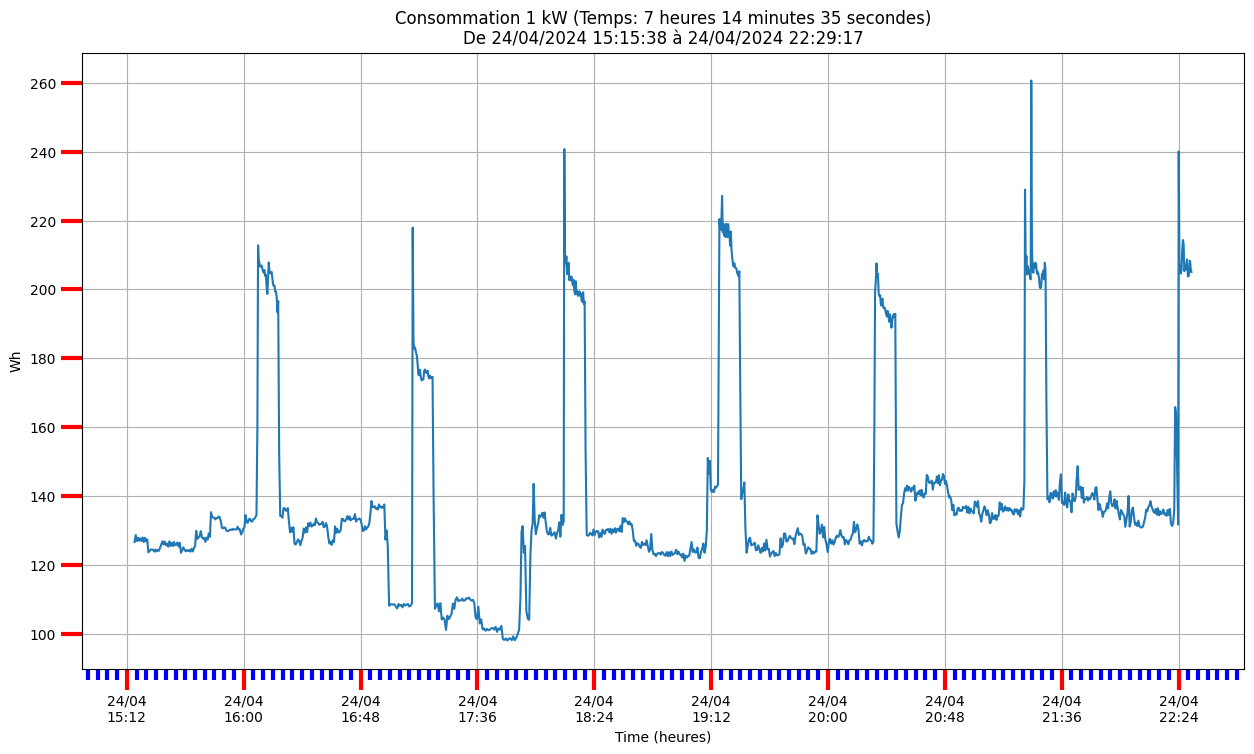

In [114]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

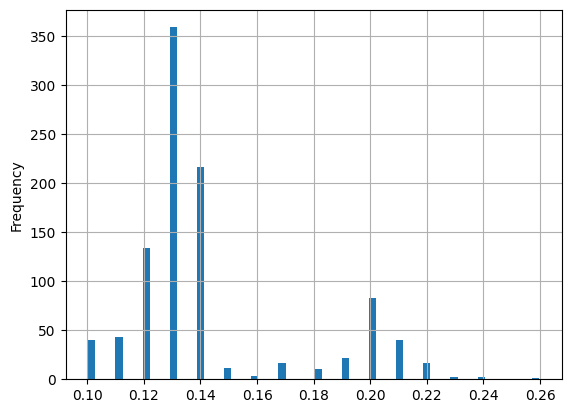

In [115]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [116]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
178414,17666,0.20,17.666,203.781275,4221539160,2024-04-24 22:28:07.861782,24/04/2024
178415,17545,0.20,17.545,205.186663,4221556705,2024-04-24 22:28:25.406782,24/04/2024
178416,17284,0.21,17.284,208.285119,4221573989,2024-04-24 22:28:42.690782,24/04/2024
178417,17473,0.21,17.473,206.032164,4221591462,2024-04-24 22:29:00.163782,24/04/2024
178418,17559,0.20,17.559,205.023065,4221609021,2024-04-24 22:29:17.722782,24/04/2024


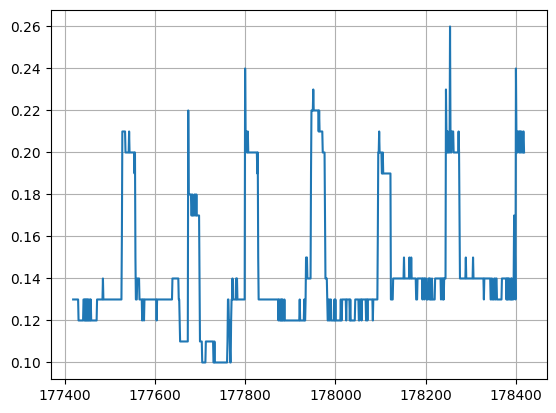

In [117]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [118]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(4221609021000.0, 70360.15035)

In [119]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 24, 22, 29, 32, 717670),
 datetime.datetime(2024, 3, 7, 1, 49, 23, 696670))

In [120]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(178419, 4221610, 1172.6694444444445)

In [121]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [122]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [123]:
732/12 # 60 jours

61.0

In [124]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

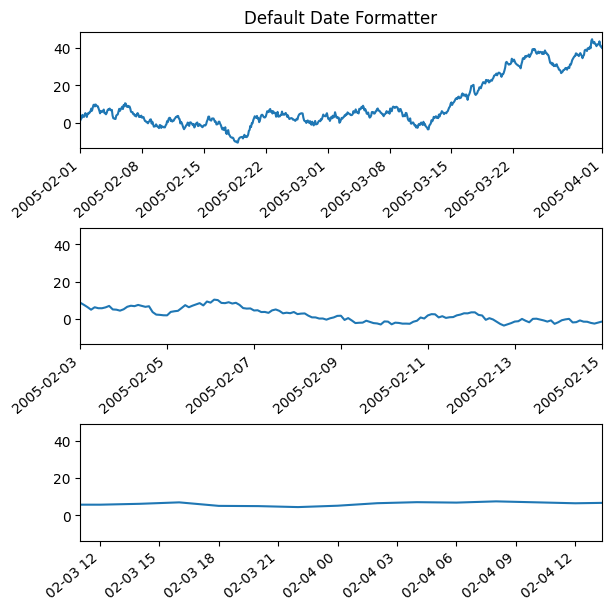

In [125]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [126]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)